### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Removing Unnecessary Columns

In [3]:
df.drop('Id',axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.shape

(150, 5)

### Statistical Summary

In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### EDA 

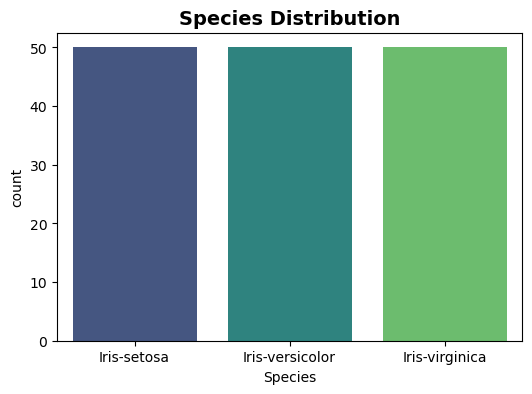

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='Species', data=df, palette='viridis')
plt.title("Species Distribution", fontsize=14, fontweight='bold')
plt.show()

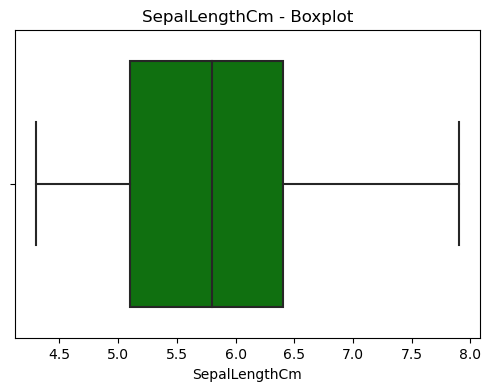

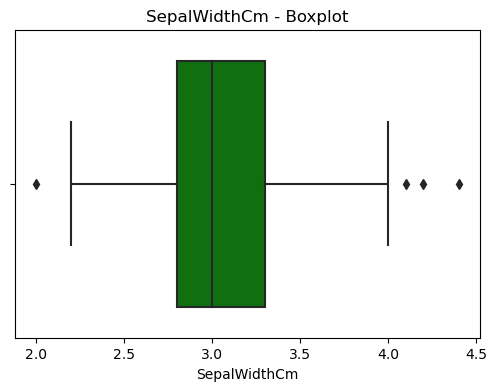

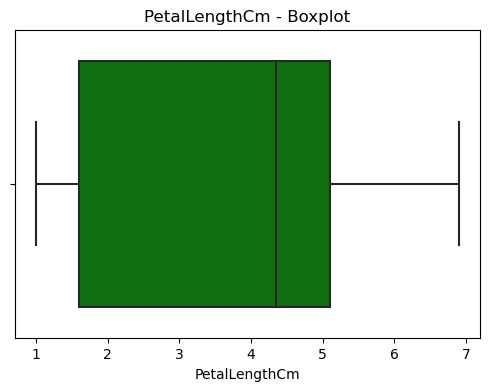

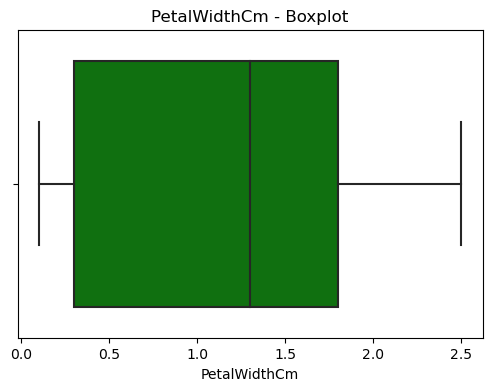

In [9]:
cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# draw boxplot for every columns
for features in cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[features],color='green')
    plt.title(f"{features} - Boxplot")
    plt.show()

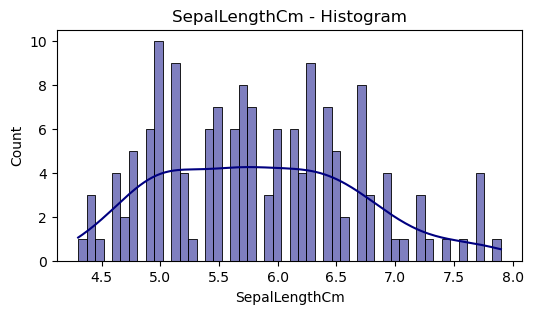

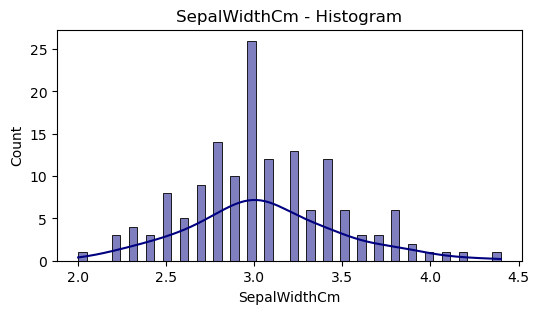

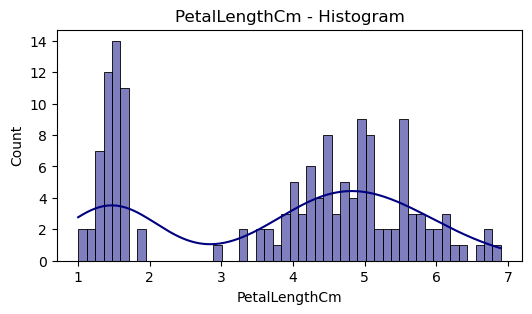

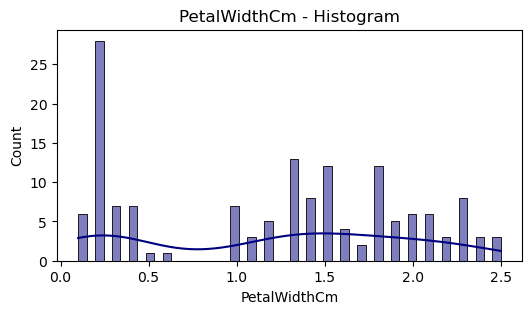

In [10]:
cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

for features in cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(x=df[features],bins= 50,kde =True,color='Navy')
    plt.title(f"{features} - Histogram")
    plt.show()


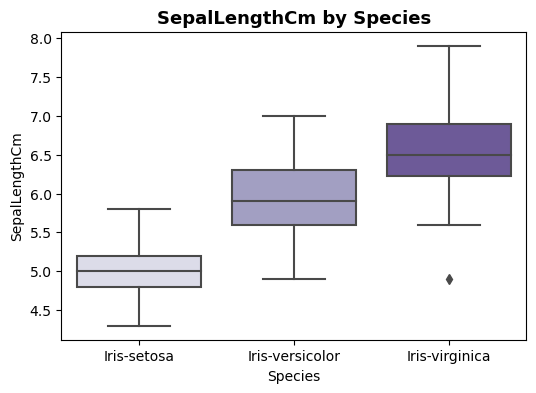

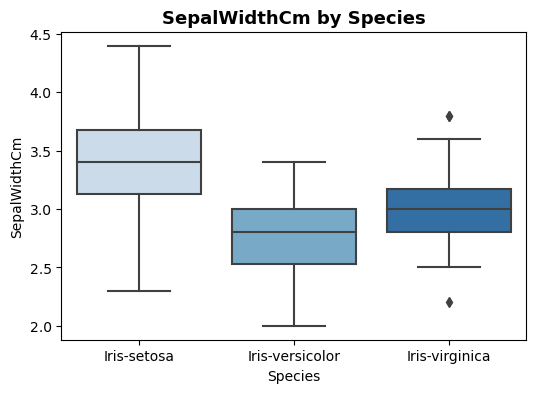

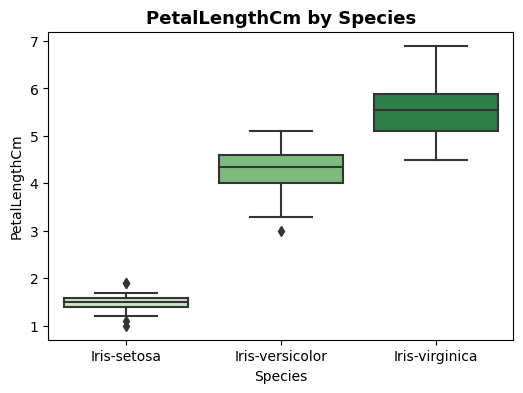

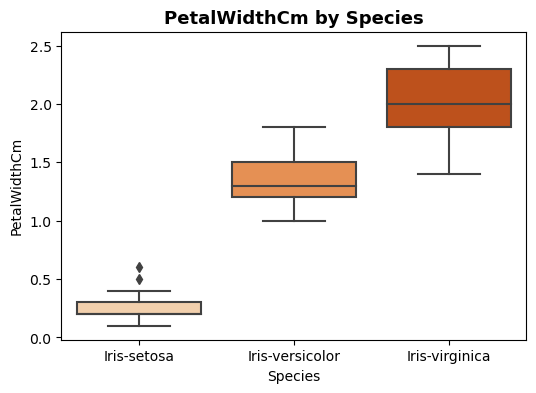

In [11]:
palettes = ['Purples', 'Blues', 'Greens', 'Oranges']
for features, pal in zip(cols, palettes):
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Species', y=features, data=df, palette=pal)
    plt.title(f"{features} by Species", fontsize=13, fontweight='bold')
    plt.show()

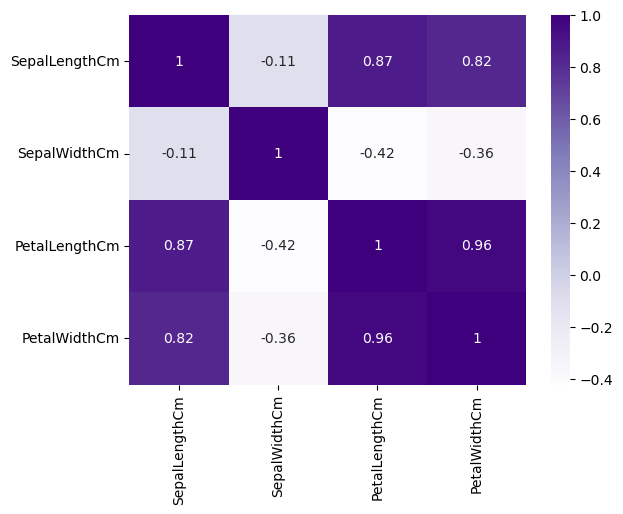

In [12]:
correlation_matrix= df.corr(numeric_only=True)
sns.heatmap(correlation_matrix,annot=True,cmap='Purples')
plt.show()


### Pair Plot for Feature Relationship

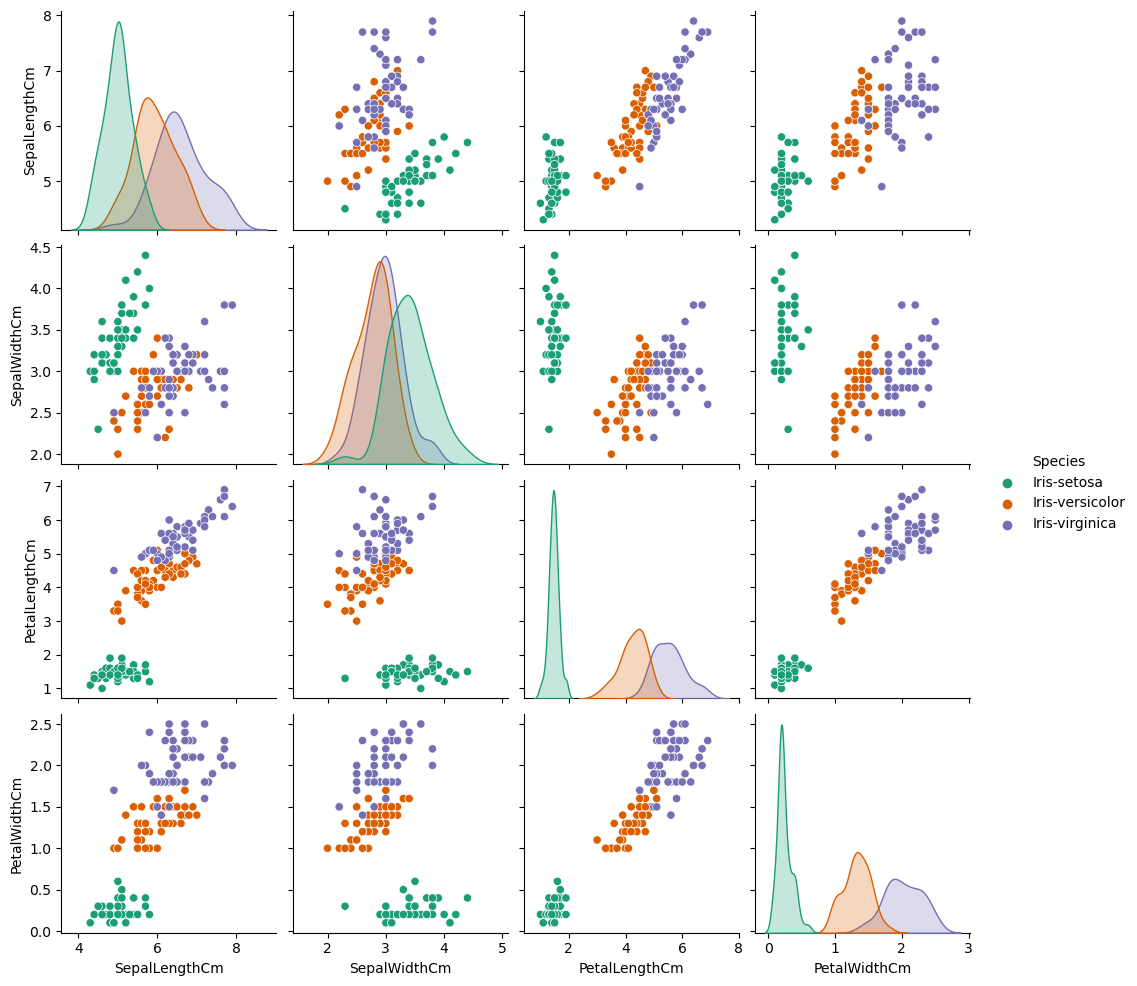

In [13]:
sns.pairplot(data=df, hue="Species", palette='Dark2', diag_kind='kde')
plt.show()

###  Model Training and Evaluation

In [14]:
X = df.drop(columns=['Species'])
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    results.append((name, acc))
    
pd.DataFrame(results, columns=["Model", "Accuracy"])


,Model,Accuracy
0,Logistic Regression,1.0
1,KNN,1.0
2,Random Forest,1.0


## Summary

- In this experiment, I analyzed the famous **Iris flower dataset** and performed classification to distinguish between three species: *Setosa, Versicolor, and Virginica*.

- We explored the dataset through descriptive statistics and visualizations such as boxplots, histograms, count plots, correlation heatmaps, and pairplots.  

    These visualizations helped us understand that:
    
        - PetalLength and PetalWidth provide the highest separation between species.
        
        
        
        
This experiment demonstrates the complete workflow of a ML classification problem from data preprocessing to model selection and performance evaluation.